Beta: [ 0.05146599 27.2980647 ]
Beta Std Error: [0.03409172 0.02704287]
Beta Covariance: [[ 0.00105249 -0.00075776]
 [-0.00075776  0.00066226]]
Residual Variance: 1.1042814805058159
Inverse Condition #: 0.031995244268901664
Reason(s) for Halting:
  Sum of squares convergence


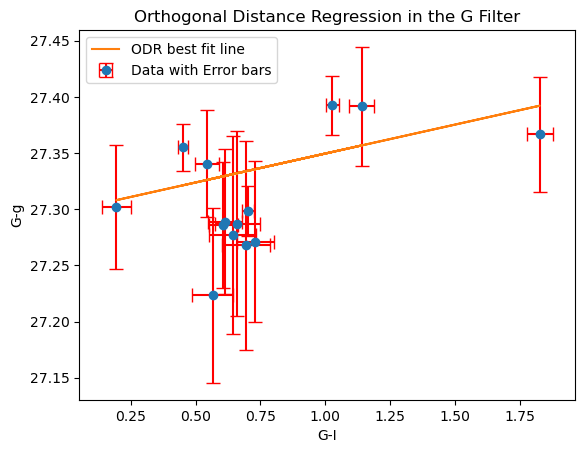

In [14]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

#Likely the MOST inconvenient way to aggregate all of the photometry data. However, there's room for improvement!
data = {
    'g': [-16.13201, -11.31456, -11.74310, -11.21512, -13.13167, -14.05071, -11.61247, -13.67655, -14.32808, -12.32723, 
          -15.05172, -14.83355, -11.46205, -12.52128],
    'i': [-15.76587, -11.51303, -11.48126, -10.94252, -12.88454, -13.83549, -11.45763, -14.57301, -13.71674, -12.19029,
         -15.20823, -14.55396, -11.33585, -12.37604],
    'gErr': [0.00070, 0.02390, 0.01613, 0.02557, 0.00501, 0.00249, 0.01806, 0.00328, 0.00206, 0.00977, 0.00130, 0.00148,
              0.02095, 0.00840],
    'iErr': [0.00084, 0.01804, 0.01822, 0.02912, 0.00563, 0.00273, 0.01862, 0.00167, 0.00298, 0.00990, 0.00114, 0.00169,
              0.02111, 0.00862],
    'known_g':[11.22300, 16.07700, 15.53400, 16.07200, 14.15400, 13.23800, 15.61100, 13.69000, 12.97400, 14.94400, 12.34100,
              12.50700, 15.80600, 14.77700],
    'known_i':[10.77100, 14.93600, 14.89100, 15.41100, 13.54700, 12.62500, 15.04500, 11.86200, 12.78000, 14.21300, 11.31300,
              11.96300, 15.11100, 14.07400],
    'known_gErr': [0.02000, 0.02900, 0.07200, 0.05700, 0.05100, 0.06200, 0.06000,  0.04800, 0.05300, 0.06200, 0.02500, 0.04600,
                  0.07200, 0.01400],
    'known_iErr': [0.07600, 0.05600, 0.06400, 0.06800, 0.03400, 0.03400, 0.06700, 0.04700, 0.52000, 0.06800, 0.05200, 0.04100,
                  0.06000, 0.03700],
}

#Convert data into a pandas DataFram
df = pd.DataFrame(data)

#Preparing ODR
x = df.known_g - df.known_i
y = df.known_g - df.g
xErr = df.known_gErr + df.iErr
yErr = df.known_gErr + df.gErr

#Defining the function to model linearity
def linear_func(p, x):
        m, c = p
        return m * x + c

#Create a model for fitting
linear_model = Model(linear_func)

#Create a RealData object using our data
data = RealData(x, y, sx = xErr, sy = yErr)

#Set up ODR with the model and data
odr = ODR(data, linear_model, beta0=[0., 1.])

#Run the regression
out = odr.run()

#Displaying the results
out.pprint()

#Plotting the data with errors and the best fit line
plt.errorbar(x, y, xerr=xErr, yerr=yErr, linestyle='None', marker='o', ecolor='r', capsize=5, label='Data with Error bars')
plt.plot(x, out.beta[0] * x + out.beta[1], label='ODR best fit line')

#Add Labels and Legend
plt.xlabel('G-I')
plt.ylabel('G-g')
plt.title('Orthogonal Distance Regression in the G Filter')
plt.legend()

#Show the plot
plt.show()

Beta: [-2.01128728e-02  2.64762349e+01]
Beta Std Error: [0.03269903 0.02875708]
Beta Covariance: [[ 0.00163195 -0.00129433]
 [-0.00129433  0.0012622 ]]
Residual Variance: 0.6551822788822288
Inverse Condition #: 0.03640109916449872
Reason(s) for Halting:
  Sum of squares convergence


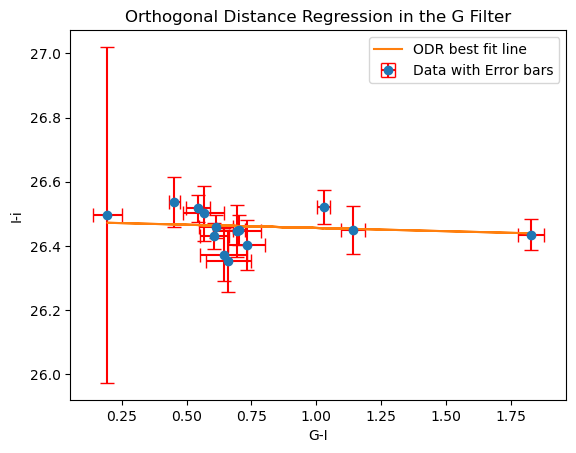

In [15]:
#Preparing ODR
x = df.known_g - df.known_i
y = df.known_i - df.i
xErr = df.known_gErr + df.iErr
yErr = df.known_iErr + df.iErr

#Defining the function to model linearity
def linear_func(p, x):
        m, c = p
        return m * x + c

#Create a model for fitting
linear_model = Model(linear_func)

#Create a RealData object using our data
data = RealData(x, y, sx = xErr, sy = yErr)

#Set up ODR with the model and data
odr = ODR(data, linear_model, beta0=[0., 1.])

#Run the regression
out = odr.run()

#Displaying the results
out.pprint()

#Plotting the data with errors and the best fit line
plt.errorbar(x, y, xerr=xErr, yerr=yErr, linestyle='None', marker='o', ecolor='r', capsize=5, label='Data with Error bars')
plt.plot(x, out.beta[0] * x + out.beta[1], label='ODR best fit line')

#Add Labels and Legend
plt.xlabel('G-I')
plt.ylabel('I-i')
plt.title('Orthogonal Distance Regression in the G Filter')
plt.legend()

#Show the plot
plt.show()